<a href="https://colab.research.google.com/github/Madhubhani/CompletableFuture/blob/master/preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATA_PATH = '/content/drive/My Drive/MLDM Project'

## Importing Modules

In [3]:
import pandas as pd
import re
import os
import datetime
import pickle
import json
from IPython.display import clear_output

from matplotlib import pyplot as plt
plt.style.use('seaborn')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import spacy
nlp = spacy.load('en')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Reading Dataset

In [4]:
train = pd.read_json(f'{DATA_PATH}/train.json')
train.head()

,Id,description,gender
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F
1,1,He is a member of the AICPA and WICPA. Brent ...,M
2,2,Dr. Aster has held teaching and research posi...,M
4,3,He runs a boutique design studio attending cl...,M
5,4,"He focuses on cloud security, identity and ac...",M


## Analysing Dataset

### Bar plot for number of samples for each gender

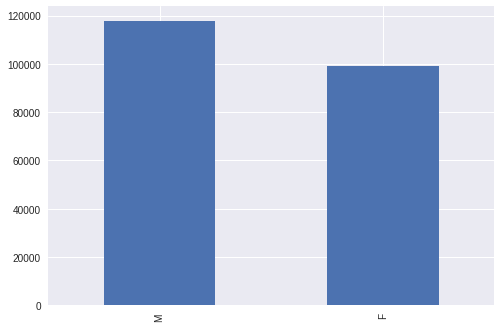

In [5]:
train['gender'].value_counts().plot.bar()

### Histogram for length of the text

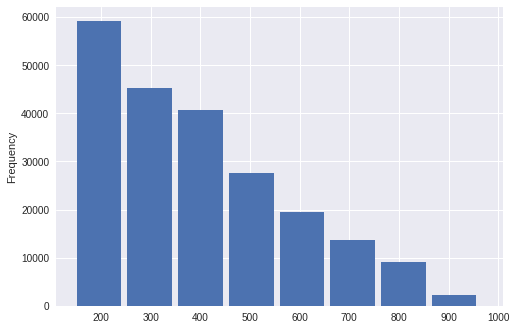

In [6]:
train['description'].apply(len).plot.hist(bins=8, width=90)

## Pre-processing

In [7]:
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    '\s+':' ', # replace multi space with one single space
}

In [8]:
def preprocess(text, lemmatize=False):

    # converting to lower characters
    text = text.lower()

    # removing abbreviations
    pattern = '|'.join(sorted(re.escape(k) for k in abbr_dict))
    text = re.sub(pattern, lambda m: abbr_dict.get(m.group(0).upper()), text, flags=re.IGNORECASE)

    # removing URLs starting with http or www., ending with .com or .fr and emails
    text = re.sub(r'(http\S+|www.\S+|\S+\.com|\S+\.fr|\S+@\S+\.\S+)', '', text)

    # removing all special characters
    text = re.sub('[^a-z ]', '', text)

    # converting string to list of words
    text = text.split()

    # removing stopwords
    stopwords_list = stopwords.words('english') + stopwords.words('french')
    text = [word for word in text if word not in stopwords_list]
    
    if lemmatize:
        # using spacy lemmatizer
        text = nlp(' '.join(text))
        text = [word.lemma_ for word in text]
    
    text = ' '.join(text)
    return text

In [10]:
clean_text = []
num_text = len(train['description'])
for ind, text in enumerate(train['description']):
    # clear cell output
    clear_output(wait=True)
    print(f'Pre-processing {ind}/{num_text} ...')
    clean_text.append(preprocess(text, lemmatize=True))
clear_output()
print('Done')

Done


## Saving Pre-processed data in Drive

In [12]:
# current date and time
now = datetime.datetime.today().strftime("%d%m%Y%H%M%S")
# path for saving the file
clean_text_path = f'{DATA_PATH}/preprocess output'
filename = f'clean_lemmatized_text_{now}.pickle'
# create the directory if it doesn't exist
if not os.path.exists(clean_text_path):
    os.mkdir(clean_text_path)
# save clean_text list in the form of a pickle file
with open(f'{clean_text_path}/{filename}', 'wb') as fp:
    pickle.dump(clean_text, fp)

print(f'File {clean_text_path}/{filename} saved.')

File /content/drive/My Drive/MLDM Project/preprocess output/clean_lemmatized_text_01112020130250.pickle saved.
